streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics.  we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves.

Description of The attributes used are as follows:

Track_id : Track ID on song

acousticness : Measure of how acoustic the track is.

danceability: Describes how suitable a track is for dancing. lower values being least danceable higher values being most danceable.

energy : Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity i.e. the enery of the song.

instrumentalness : Measure whether a track contains vocals. Sounds are treated as instrumental in this context. Values ranges from 0.0 to 1.0

liveness :Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

speechiness :Detects the presence of spoken words in a track.Values > 0.6 might be a podcast or talk show, where 0.3 to 0.6 is the normal range for songs and if its less than 0.3 its mostly music

tempo : Overall estimated tempo of a track in beats per minute (BPM)

valence :Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive , while tracks with low valence sound more negative.

genre_top : Name of the genre related to the playlist which the song is in.



In [123]:
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv('/Users/himanshu/Documents/backtest/livesignal/Classify Song Genres from Audio Data/datasets/fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
echonest_metrics = pd.read_json('/Users/himanshu/Documents/backtest/livesignal/Classify Song Genres from Audio Data/datasets/echonest-metrics.json', precise_float=True)

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on='track_id')

# Inspect the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [124]:
echo_tracks.shape

(4802, 10)

In [125]:
duplicate_rows_df = echo_tracks[echo_tracks.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [126]:
#searching for missing values

print(echo_tracks.isnull().sum())

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64


In [127]:
echo_tracks.loc[:, echo_tracks.columns != 'track_id'].describe()

acousticness  danceability       energy  instrumentalness     liveness  \
count  4.802000e+03   4802.000000  4802.000000       4802.000000  4802.000000   
mean   4.870600e-01      0.436556     0.625126          0.604096     0.187997   
std    3.681396e-01      0.183502     0.244051          0.376487     0.150562   
min    9.491000e-07      0.051307     0.000279          0.000000     0.025297   
25%    8.351236e-02      0.296047     0.450757          0.164972     0.104052   
50%    5.156888e-01      0.419447     0.648374          0.808752     0.123080   
75%    8.555765e-01      0.565339     0.837016          0.915472     0.215151   
max    9.957965e-01      0.961871     0.999768          0.993134     0.971392   

       speechiness        tempo      valence  
count  4802.000000  4802.000000  4802.000000  
mean      0.104877   126.687944     0.453413  
std       0.145934    34.002473     0.266632  
min       0.023234    29.093000     0.014392  
25%       0.036897    98.000750     0.224617  
50%       0.049594   124.625500     0.446240  
75%       0.088290   151.450000     0.666914  
max       0.966177   250.059000     0.983649

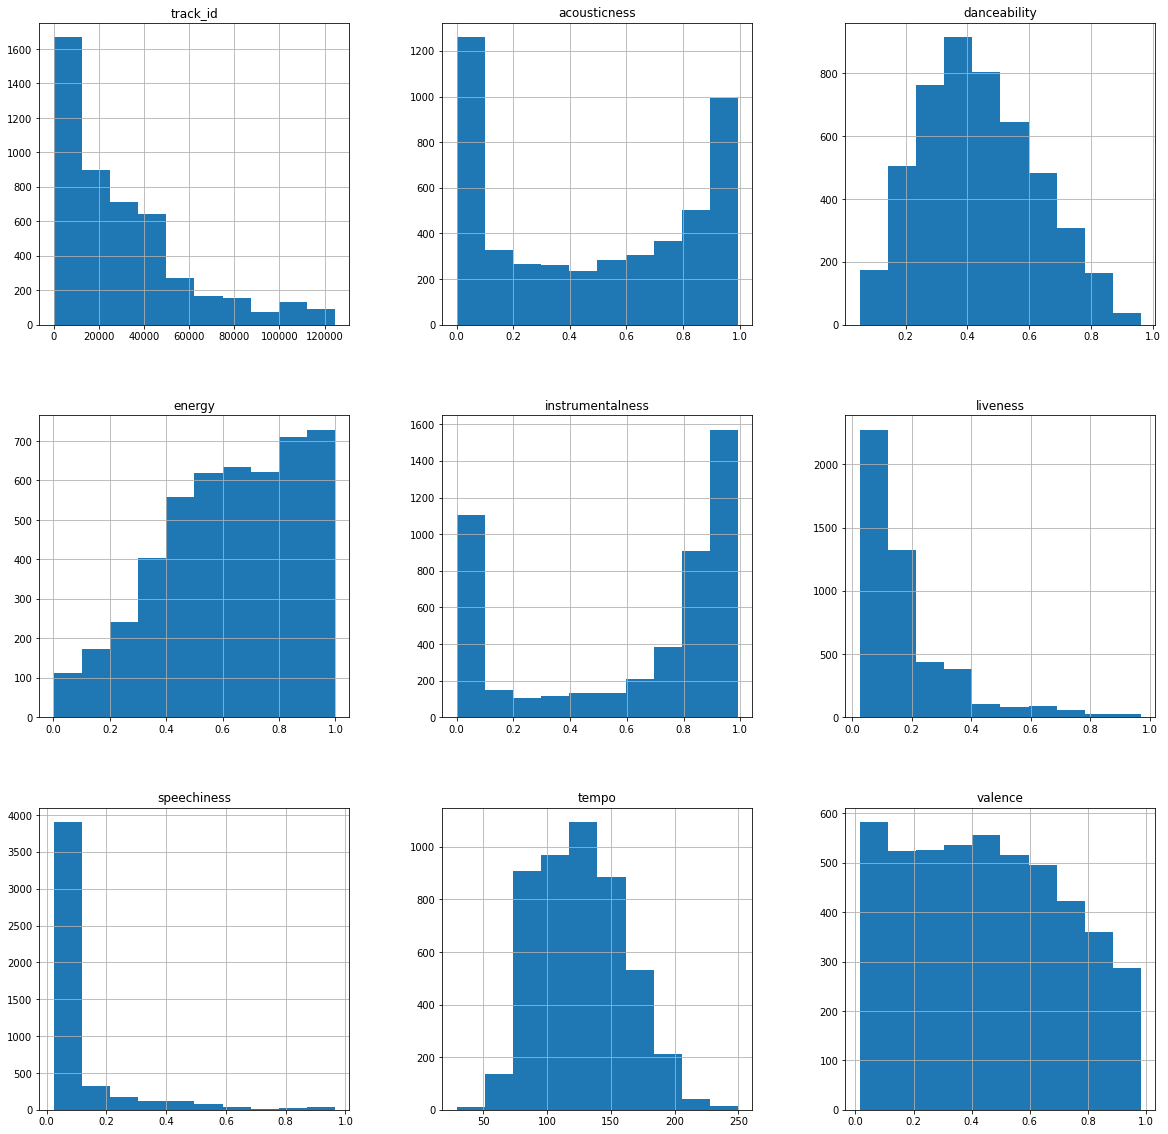

In [128]:
p = echo_tracks.hist(figsize = (20,20))


From the above histograms we can see that 'liveness' and 'speechiness' have a distribution which is right skewed and the distribution of instrumentalness is left skewed.

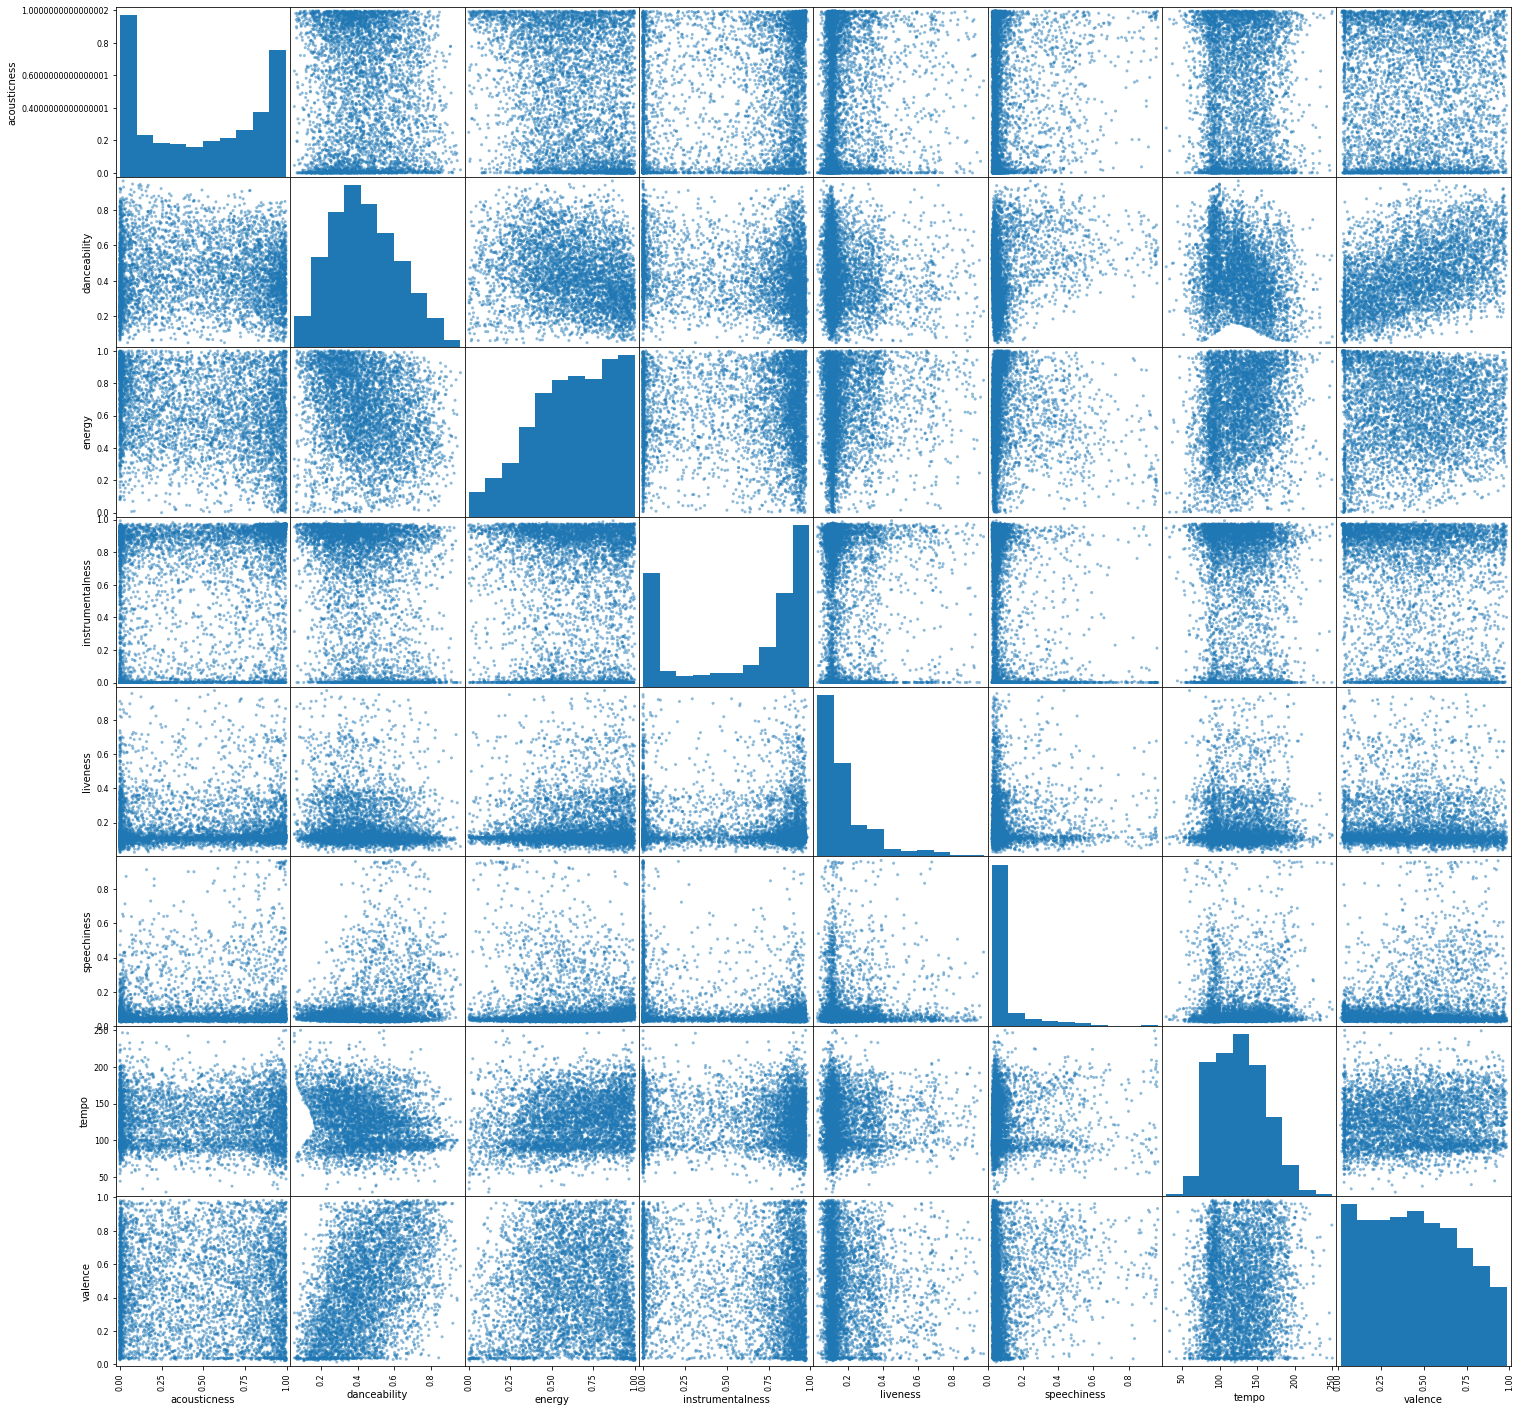

In [61]:
#scatter plots
from pandas.plotting import scatter_matrix
p=scatter_matrix(  echo_tracks.loc[:, echo_tracks.columns != 'track_id'],figsize=(25, 25))

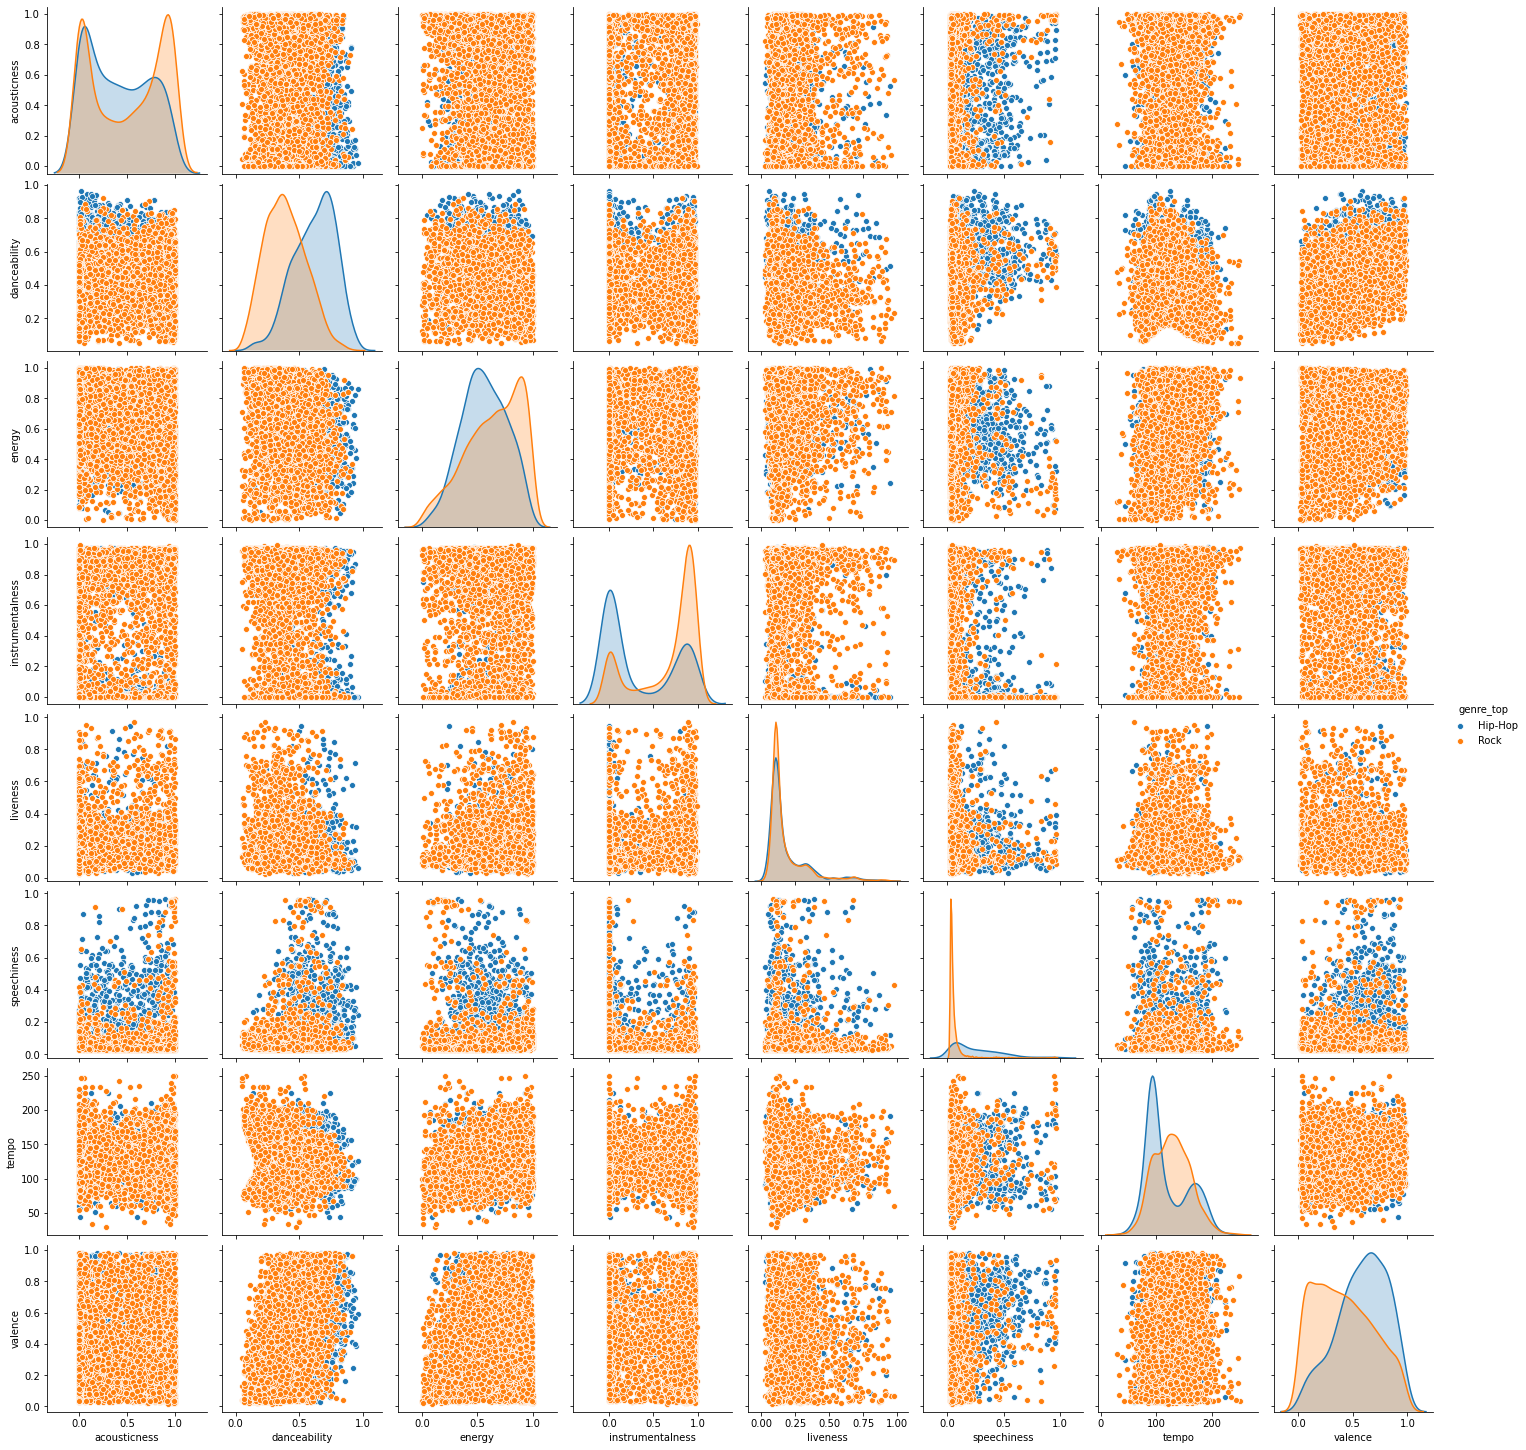

In [62]:
#pair plot
p=sns.pairplot(echo_tracks.loc[:, echo_tracks.columns != 'track_id'], hue = 'genre_top')


In [63]:
# Create a correlation matrix
corr_metrics = echonest_metrics.loc[:, echonest_metrics.columns != 'track_id'].corr()
corr_metrics.style.background_gradient()    

In [129]:
echo_tracks['genre_top'].unique()

array(['Hip-Hop', 'Rock'], dtype=object)

In [130]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'genre_top'.
echo_tracks['genre_top']= label_encoder.fit_transform(echo_tracks['genre_top'])
 
echo_tracks['genre_top'].unique()

array([0, 1])

In [131]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Create features
features = echo_tracks.drop(["genre_top", "track_id"], axis=1)

# Create labels
labels = echo_tracks["genre_top"]

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            random_state=10,train_size=.8)

In [132]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale train_features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [133]:
scaled_train_features

array([[-1.32723663, -1.60192082,  0.8522454 , ..., -0.32080808,
        -0.88900311, -0.89856467],
       [-1.17142068,  0.93101849, -1.74817869, ..., -0.10335188,
        -1.68857722,  1.18510318],
       [ 1.15071455,  0.62287157, -1.63489905, ..., -0.51519994,
        -1.5498347 , -1.28857339],
       ...,
       [ 0.57814043,  0.32532544,  1.08939959, ...,  0.09000266,
        -0.98929607, -1.50642839],
       [-0.58948562, -1.06604924,  0.95933356, ..., -0.44045215,
         0.19041309,  0.61916638],
       [ 0.87061558, -1.56374376,  0.62047897, ..., -0.32058625,
         1.3470525 , -1.16705948]])

<AxesSubplot:xlabel='genre_top', ylabel='count'>

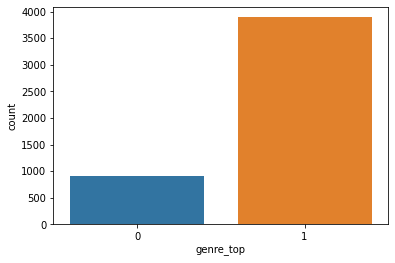

In [134]:
import seaborn as sns
sns.countplot(echo_tracks['genre_top'], label = "Count") 

<AxesSubplot:xlabel='genre_top', ylabel='count'>

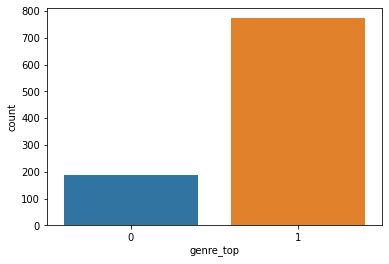

In [135]:
import seaborn as sns
sns.countplot(test_labels, label = "Count") 

In [136]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logisitic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(scaled_train_features, train_labels)
pred_labels_logit = logreg.predict(scaled_test_features)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(test_labels,pred_labels_logit),\
            columns=["Predicted Hip-Hop", "Predicted Rock"],\
            index=["Hip-Hop","Rock"] )

Predicted Hip-Hop  Predicted Rock
Hip-Hop                113              75
Rock                    25             748

0.8959417273673257
0.9676584734799483
0.9088699878493317
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       188
           1       0.91      0.97      0.94       773

    accuracy                           0.90       961
   macro avg       0.86      0.78      0.82       961
weighted avg       0.89      0.90      0.89       961

0.7843611516335912


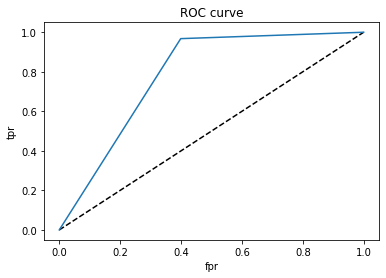

In [138]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,pred_labels_logit))

# True Positive Rate/Recall/Sensitivity

from sklearn.metrics import recall_score
print(recall_score(test_labels,pred_labels_logit))

from sklearn.metrics import precision_score
print(precision_score(test_labels,pred_labels_logit))


# Create the classification report for the models
from sklearn.metrics import classification_report
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Logistic Regression: \n", class_rep_log)

##AUC & ROC Curve

from sklearn.metrics import roc_curve, auc


FPR, TPR, _ = roc_curve(test_labels, pred_labels_logit)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(FPR,TPR, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. we will try to solve this issue later on in the notebook.

In [139]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

# Train our decision tree
tree.fit(scaled_train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(scaled_test_features)





In [140]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(test_labels,pred_labels_tree),\
            columns=["Predicted Hip-Hop", "Predicted Rock"],\
            index=["Hip-Hop","Rock"] )

Predicted Hip-Hop  Predicted Rock
Hip-Hop                134              54
Rock                    62             711

0.8792924037460979
0.9197930142302717
0.9294117647058824
Decision Tree: 
               precision    recall  f1-score   support

           0       0.68      0.71      0.70       188
           1       0.93      0.92      0.92       773

    accuracy                           0.88       961
   macro avg       0.81      0.82      0.81       961
weighted avg       0.88      0.88      0.88       961

0.8162794858385402


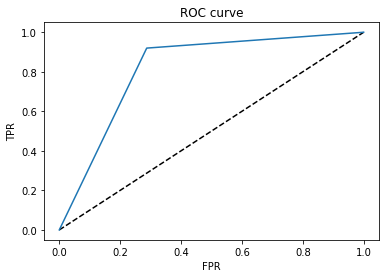

In [141]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,pred_labels_tree))

# True Positive Rate/Recall/Sensitivity

from sklearn.metrics import recall_score
print(recall_score(test_labels,pred_labels_tree))

from sklearn.metrics import precision_score
print(precision_score(test_labels,pred_labels_tree))


# Create the classification report for the models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)

print("Decision Tree: \n", class_rep_tree)

##AUC & ROC Curve

from sklearn.metrics import roc_curve, auc


FPR, TPR, _ = roc_curve(test_labels, pred_labels_tree)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(FPR,TPR, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

We can see from the above results that the Decision tree classifier is giving a slightly better auc_roc score than logistics regression

Also, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. we will try to solve this issue later on in the notebook.

In [77]:
## feature importance
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = train_features.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)


importance
speechiness         0.403931
danceability        0.170941
acousticness        0.114601
tempo               0.086357
instrumentalness    0.066703
valence             0.066667
energy              0.063523
liveness            0.027277

These are the top 10 features determined by Decision Tree helped classifing the genre.


####################################################
####################################################

I will only be using PCA for demonstration purposes, in a case with such few attributes as this topic PCA is not justified or recommended.

####################################################
####################################################

Performing Principal Component Analysis on our scaled data:
It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes.

However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our train and test features. There are a few methods to do this, but a common way is through standardization, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score). we have already normalized our data in previous steps.



Text(0.5, 0, 'Principal Component #')

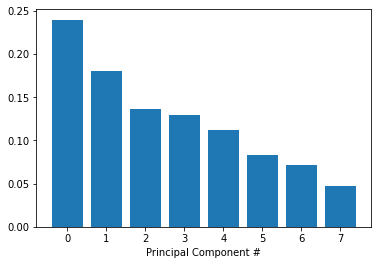

In [78]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. Instead, we can also look at the cumulative explained variance plot to determine how many features are required to explain, say, about 85% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.

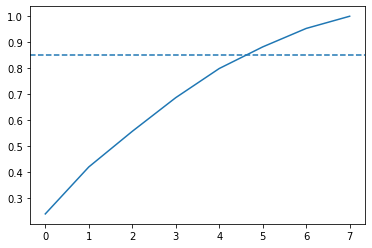

In [79]:
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

We see from the above plot that 6 features (remember indexing starts at 0) can explain 85% of the variance!
Therefore, we can use 6 components to perform PCA and reduce the dimensionality of our train and test features.

In [80]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=6, random_state=10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)



Now lets test our model with logistic regression and decision tree again after PCA




In [81]:
# Train our logisitic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(test_labels,pred_labels_logit),\
            columns=["Predicted Hip-Hop", "Predicted Rock"],\
            index=["Hip-Hop","Rock"] )

Predicted Hip-Hop  Predicted Rock
Hip-Hop                103              85
Rock                    27             746

In [86]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,pred_labels_logit))

# True Positive Rate/Recall/Sensitivity

from sklearn.metrics import recall_score
print(recall_score(test_labels,pred_labels_logit))

from sklearn.metrics import precision_score
print(precision_score(test_labels,pred_labels_logit))


# Create the classification report for the models
from sklearn.metrics import classification_report
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Logistic Regression: \n", class_rep_log)

##AUC & ROC Curve

from sklearn.metrics import roc_curve, auc


FPR, TPR, _ = roc_curve(test_labels, pred_labels_logit)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

0.8834547346514048
0.9650711513583441
0.8977135980746089
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.79      0.55      0.65       188
           1       0.90      0.97      0.93       773

    accuracy                           0.88       961
   macro avg       0.85      0.76      0.79       961
weighted avg       0.88      0.88      0.87       961

0.7564717458919381


Using PCA did not improve our result and looking at our classification report, also we have same issue as before of  rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. we will try to solve this issue later on in the notebook.

In [91]:


# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

# Train our decision tree
tree.fit(train_pca, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(test_labels,pred_labels_tree),\
            columns=["Predicted Hip-Hop", "Predicted Rock"],\
            index=["Hip-Hop","Rock"] )

Predicted Hip-Hop  Predicted Rock
Hip-Hop                122              66
Rock                    66             707

In [94]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,pred_labels_tree))

# True Positive Rate/Recall/Sensitivity

from sklearn.metrics import recall_score
print(recall_score(test_labels,pred_labels_tree))

from sklearn.metrics import precision_score
print(precision_score(test_labels,pred_labels_tree))


# Create the classification report for the models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)

print("Decision Tree: \n", class_rep_tree)

##AUC & ROC Curve

from sklearn.metrics import roc_curve, auc


FPR, TPR, _ = roc_curve(test_labels, pred_labels_tree)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)


0.8626430801248699
0.9146183699870634
0.9146183699870634
Decision Tree: 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       188
           1       0.91      0.91      0.91       773

    accuracy                           0.86       961
   macro avg       0.78      0.78      0.78       961
weighted avg       0.86      0.86      0.86       961

0.7817772700999146


we can see tha decsion tree is giving better result than losgistic regression but Using PCA did not improve our result and looking at our classification report, also we have same issue as before of  rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. we will try to solve this issue now.



Balance our data for greater performance:

just by looking at the number of data points we have for each class, we see that we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just rock songs, which is less than ideal. To account for this, we can weight the value of a correct classification in each class inversely to the occurrence of data points for each class. Since a correct classification for "Rock" is not more important than a correct classification for "Hip-Hop" (and vice versa), we only need to account for differences in sample size of our data points when weighting our classes here, and not relative importance of each class.

In [99]:
# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on='track_id')

# Subset a balanced proportion of data points
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# subset only the rock songs, and take a sample the same size as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

We've now balanced our dataset, but in doing so, we've removed a lot of data points that might have been crucial to training our models. Let's test to see if balancing our data improves model bias towards the "Rock" classification while retaining overall classification performance.

Note that we have already reduced the size of our dataset and will go forward without applying any dimensionality reduction. In practice, we would consider dimensionality reduction more rigorously when dealing with vastly large datasets and when computation times become prohibitively large.

In [102]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca, train_labels)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))




Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



Balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what's called cross-validation (CV). This step allows us to compare models in a more rigorous fashion.
I will use what's known as K-fold CV here. K-fold first splits the data into K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score.

In [120]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("logreg", LogisticRegression(random_state=10))])

# Set up our K-fold cross-validation
kf = KFold(10)

# Train our models using KFold cv
tree_score = cross_val_score(tree_pipe, features, labels, cv=kf)
logit_score = cross_val_score(logreg_pipe, features, labels, cv=kf)

# Print the mean of each array o scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7582417582417582 Logistic Regression: 0.782967032967033
